# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD28"
COLLABORATORS = "Radosław Matuszczyk 405124, Piotr Łukasiewicz 406163"

---

## Zestaw zadań 2: Elementy statystyki opisowej 2 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from scipy.stats import kurtosis

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku recession_data_1.csv do tablicy `recession_data_1` w taki sposób, aby kolumna Country Code stanowiła indeks tablicy oraz dane z pliku recession_table_1.pkl do tablicy `recession_table_1`.

Wyświetl przygotowane tablice.

In [4]:
# recession_data_1
recession_data_1 = pd.read_csv('recession_data_1.csv', index_col=0)
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


In [5]:
# recession_table_1
recession_table_1 = pd.read_pickle('recession_table_1.pkl')
recession_table_1

Year,2006,2007,2008,2009,2010,2011
"(-20, -15]",0.0,0.0,1.0,2.0,0.0,0.0
"(-15, -10]",0.0,0.0,1.0,9.0,0.0,2.0
"(-10, -5]",1.0,2.0,5.0,26.0,5.0,6.0
"(-5, 0]",15.0,6.0,26.0,59.0,17.0,17.0
"(0, 5]",71.0,78.0,90.0,68.0,89.0,96.0
"(5, 10]",93.0,90.0,64.0,27.0,72.0,68.0
"(10, 15]",14.0,17.0,9.0,6.0,12.0,7.0
"(15, 20]",1.0,4.0,2.0,0.0,1.0,1.0
"(20, 25]",0.0,1.0,0.0,1.0,1.0,1.0
"(25, 30]",2.0,0.0,0.0,0.0,1.0,0.0


### Zadanie 4: Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy [5 pkt]

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

In [6]:
# YOUR CODE HERE
def quantile(n): # n = 1,2,3
    p = n*25
    def percentile_(a):
        return np.percentile(a, p, axis=0)
    percentile_.__name__ = f'Q{n}'
    return percentile_


descriptive_parameters_1 = recession_data_1[['2006', '2007', '2008', '2009', '2010', '2011']].agg(['mean', 'std', 'min', quantile(1), quantile(2), quantile(3), 'max', 'kurt', 'skew'])

descriptive_parameters_1

,2006,2007,2008,2009,2010,2011
mean,5.678241,5.676541,3.658874,-0.099351,4.285734,3.812680
std,4.659570,4.128360,4.494198,5.812413,4.503445,4.354840
min,-6.871463,-6.684028,-17.668946,-17.573222,-8.924176,-12.714897
Q1,3.455779,3.204031,1.004863,-3.739051,1.719445,1.636183
Q2,5.404226,5.622465,3.807492,0.129142,4.132582,3.821286
Q3,7.560790,7.700604,6.240954,3.499009,6.705470,6.316869
max,34.500000,25.000000,17.799109,21.390528,25.122760,21.616529
kurt,10.163041,2.877701,3.166838,0.931665,3.435235,3.107475
skew,1.870104,0.723625,-0.597186,-0.150527,0.649393,-0.107946


In [7]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_1.loc["mean", "2006"], 5.678241)
assert np.isclose(descriptive_parameters_1.loc["std", "2007"], 4.128360)
assert np.isclose(descriptive_parameters_1.loc["min", "2008"], -17.668946)
assert np.isclose(descriptive_parameters_1.loc["Q1", "2009"], -3.739051)
assert np.isclose(descriptive_parameters_1.loc["Q2", "2010"], 4.132582)
assert np.isclose(descriptive_parameters_1.loc["Q3", "2011"], 6.316869)
assert np.isclose(descriptive_parameters_1.loc["max", "2006"], 34.5)
assert np.isclose(descriptive_parameters_1.loc["kurt", "2007"], 2.877701)
assert np.isclose(descriptive_parameters_1.loc["skew", "2008"], -0.597186)

### Zadanie 5: Praca z szeregami rozdzielczymi (25 pkt)
Na potrzeby realizacji tego zadania załóżmy, że nie były dostępne dane szczegółowe, a jedynie tablica szeregu rozdzielczego przedziałowego. Ma to istotny wpływ na proces dokonywania obliczeń i wizualizacji wyników. Wykonaj poniższe zadanie bazując wyłącznie na danych z tablicy `recession_table_1`.

Uwaga! Zadanie nie zawiera pełnej analizy danych, i ma wyłącznie charakter demonstracji pokazującej jak można prowadzić analizę, gdy nie są dostępne dane szczegółowe.

#### a) Obliczanie wartości wybranych opisowych charakterystyk rozkładu

Korzystając z danych zawartych w tablicy `recession_table_1` oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- kwartyle (ang. quartiles),
- moda (ang. mode).

Zestaw wyniki w tablicy `descriptive_parameters_2`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, Q1, Q2, Q3, mode.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)
 
Uwaga! W celu otrzymania maksymalnej liczby punktów otrzymane wyniki powinny być w całości wynikiem pracy napisanego kodu, bez manualnego określania, w którym przedziale znajdują się określone statystyki itp.

In [8]:
# YOUR CODE HERE4
def interval_mean(series):
    midpoints = series.index.mid.to_numpy()
    counts = series.values
    return midpoints @ counts / counts.sum()

interval_mean.__name__ = 'mean'

def interval_std(series):
    counts = series.values
    mean = interval_mean(series)
    midpoints = series.index.mid.to_numpy()
    return np.sqrt((midpoints - mean)**2 @ counts / counts.sum())

interval_std.__name__ = 'std'

def interval_quartile(k):
    if k not in [1,2,3]:
        raise ValueError
    def quartile_(series):
        counts = series.values
        quartile_estimated_index = k*counts.sum()/4
        cumulative_counts = counts.cumsum()
        quartile_interval_index = np.where(cumulative_counts > quartile_estimated_index)[0][0]
        quartile_interval = series.index[quartile_interval_index]
        return quartile_interval.left + (k*counts.sum()/4 - counts[:quartile_interval_index].sum()) / counts[quartile_interval_index] * quartile_interval.length

    quartile_.__name__ = f'Q{k}'
    return quartile_


def interval_mode(series):
    counts = series.values
    mode_interval_indexes = np.where(counts == np.max(counts))
    if len(mode_interval_indexes) > 1:
        return np.nan
    mode_index = mode_interval_indexes[0].item()
    mode_interval = series.index[mode_index]
    before_count = counts[mode_index - 1] if mode_index > 0 else 0
    next_count = counts[mode_index + 1] if mode_index < len(counts) else 0
    mode_count = counts[mode_index]
    return mode_interval.left + (mode_count - before_count) / ((mode_count - before_count) + (mode_count - next_count)) * mode_interval.length

interval_mode.__name__ = 'mode'

descriptive_parameters_2 = recession_table_1[['2006', '2007', '2008', '2009', '2010', '2011']] \
    .agg([interval_mean, interval_std, interval_quartile(1), interval_quartile(2), interval_quartile(3), interval_mode])

descriptive_parameters_2

Year,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.101010,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,8.306452,8.472222,6.992188,3.860294,7.604167,7.022059
mode,6.089109,5.705882,3.555556,0.900000,4.044944,3.691589


In [9]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_2.loc["mean", "2006"], 5.606061)
assert np.isclose(descriptive_parameters_2.loc["std", "2007"], 4.184001)
assert np.isclose(descriptive_parameters_2.loc["Q1", "2008"], 0.916667)
assert np.isclose(descriptive_parameters_2.loc["Q2", "2009"], 0.220588)
assert np.isclose(descriptive_parameters_2.loc["Q3", "2010"], 7.604167)
assert np.isclose(descriptive_parameters_2.loc["mode", "2011"], 3.691589)

#### b) Wizualizacja
Zwizualizuj dane z tablic `recession_table_1` oraz `descriptive_parameters_2` za pomocą:
 - histogramu zliczeń (lewa oś wykresu) z nałożonym na niego łamaną częstości skumulowanej (prawa oś wykresu) wykonanych dla jednego, wybranego przez siebie roku,
 - diagramów częstości wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych,
 - wykresów pudełkowych wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych.
 
Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x2, przy czym wykres pudełkowy zajmuje oba pola w dolnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Postaraj się, w miarę istniejących możliwości, aby formatowanie wykresów było jak najbardziej zbliżone do formatowania wykresów przygotowanych w poprzednim notatniku, dodatkowo:

dla histogramu i łamanej częstości skumulowanej:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- ustaw kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla diagramów częstości:
- ustaw kolory identyczne z tymi przypisanymi poszczególnym latom w zadaniu 3a,
- dodaj do wykresu legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla wykresu pudełkowego:
- ustaw kolor linii pudełka identyczny z kolorem ich wypełnienia w zadaniu 3b,
- ustaw kolor linii wąsów identyczny z ich kolorem w zadaniu 3b.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej oraz mediany.

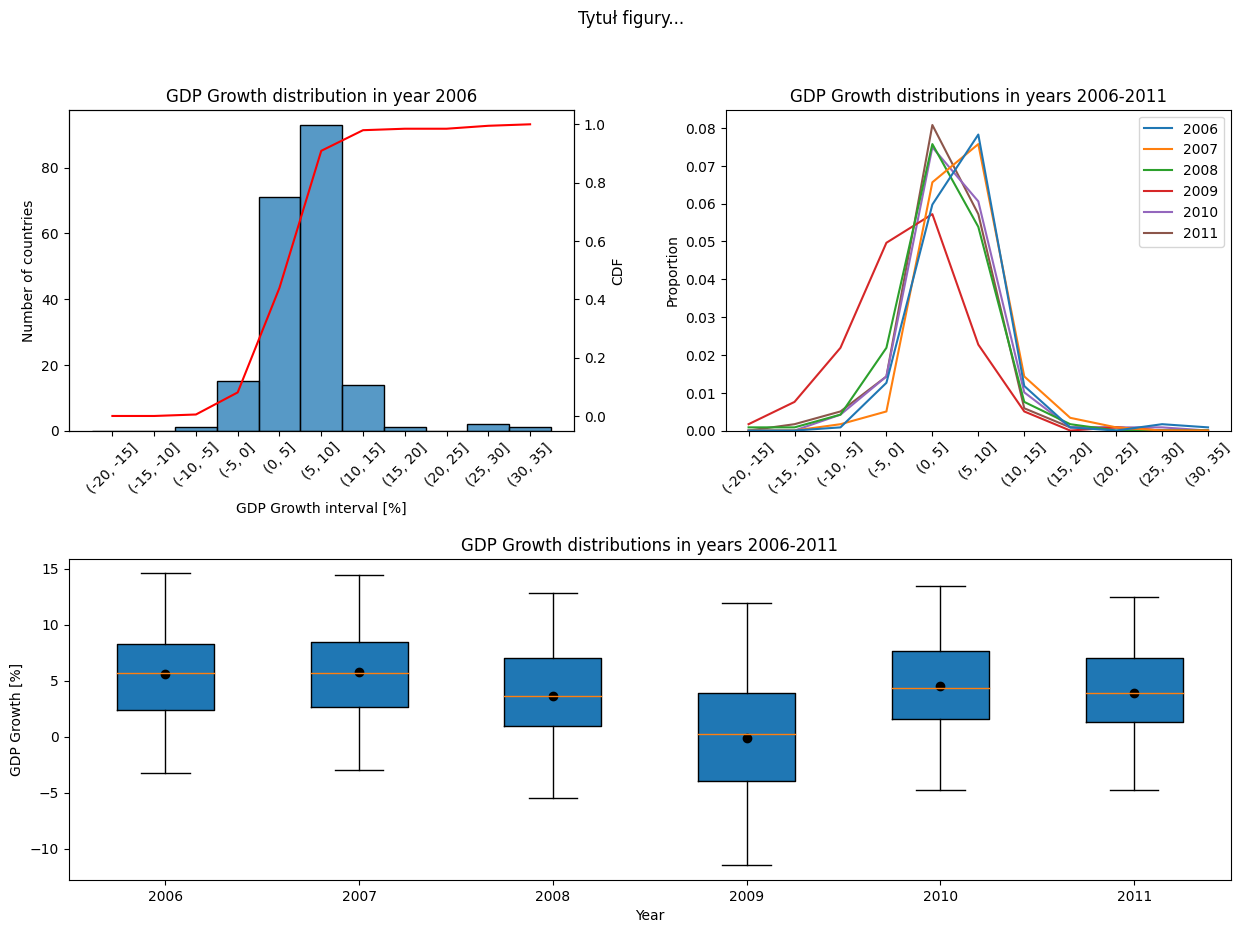

In [13]:
from matplotlib.patches import Polygon
recession_table_1['midpoints'] = recession_table_1.index.mid
recession_table_1['2006_cdf'] = recession_table_1['2006'].cumsum() / recession_table_1['2006'].sum()

years = np.arange(2006, 2012).astype(str).tolist()
intervals_expanded = {year: [] for year in years}
for i, row in recession_table_1.iterrows():
    for year in years:
        intervals_expanded[year].extend([row['midpoints']] * int(row[year]))

df_expanded = pd.DataFrame(intervals_expanded)

x_labels = recession_table_1.index.astype(str).tolist()
x_ticks = np.arange(-17.5, 33, 5)
x_breaks = np.arange(-20, 36, 5)

fig = plt.figure(figsize=[15,10])
plt.suptitle("Tytuł figury...")
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax1_l = ax1
ax1_r = ax1.twinx()

ax1.set_title('GDP Growth distribution in year 2006')
sns.lineplot(data=recession_table_1, x='midpoints',y='2006_cdf', ax=ax1_r, color='red')
sns.histplot(data=df_expanded, x='2006', ax=ax1_l, color='tab:blue', bins=x_breaks)
ax1.set_xticks(labels=x_labels, ticks=x_ticks, rotation=45)
ax1.set_xlabel('GDP Growth interval [%]')
ax1_l.set_ylabel('Number of countries')
ax1_r.set_ylabel('CDF')

ax2.set_title('GDP Growth distributions in years 2006-2011')
sns.histplot(data=df_expanded, stat='proportion', ax=ax2, fill=False, element='poly',  bins=x_breaks)
ax2.set_xticks(labels=x_labels, ticks=x_ticks, rotation=45)

box_data = []
for year in years:
    params = descriptive_parameters_2[year].to_dict()
    Q1, Q2, Q3 = params['Q1'], params['Q2'], params['Q3']
    IQR = Q3 - Q1
    max_value = params['mean'] + 3*params['std']
    min_value = params['mean'] - 3*params['std']
    lower_whis = max(min_value, Q2 - 1.5*IQR)
    upper_whis = min(max_value, Q2 + 1.5*IQR)
    box_data.append([lower_whis, Q1, Q2, Q3, upper_whis])

ax3 = fig.add_subplot(2,1,2)

ax3.set_title('GDP Growth distributions in years 2006-2011')
bp = ax3.boxplot(box_data, vert=True)
for box in bp['boxes']:
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    ax3.add_patch(Polygon(box_coords, facecolor='tab:blue'))
    
ax3.scatter(np.arange(len(years))+1, descriptive_parameters_2[descriptive_parameters_2.index == 'mean'], color='black')
ax3.set_xticks(labels=years, ticks=np.arange(len(years))+1)
ax3.set_xlabel('Year')
ax3.set_ylabel('GDP Growth [%]')

fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()